In [1]:
import os
import imgaug
from skimage import io, transform
from skimage import img_as_ubyte
from imgaug import augmenters as iaa
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import random

# ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In C:\Users\Flayiva_07\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Flayiva_07\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Flayiva_07\anaconda3\envs\pytorchenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
%matplotlib inline

In [3]:
# images = np.random.randint(0, 255, (16, 128, 128, 3), dtype=np.uint8)
SAMPLE_PATH = "data/test/001.bmp"
TXT_PATH = "data/test/001.txt"

In [5]:
img = img_as_ubyte(io.imread(SAMPLE_PATH, as_gray=True))
img.shape

(2400, 1935)

In [6]:
x,y = img.shape

In [7]:
SCALE = 15

In [8]:
img_dimmed = np.expand_dims(img, axis=0)

In [9]:
img_dimmed

array([[[252, 252, 253, ..., 253, 253,   0],
        [252, 252, 252, ..., 253, 253,   0],
        [252, 252, 252, ..., 253, 253,   0],
        ...,
        [252, 252, 252, ..., 134, 148,   0],
        [254, 254, 254, ..., 140, 136,  10],
        [  0,   0,   0, ...,   3,   1,   0]]], dtype=uint8)

In [10]:
def extract_labels_from_txt(path):
    with open(path, "r") as f:
        # only first 19 are actual coords in dataset label files
        coords_raw = f.readlines()[:19]
        coords_raw = [tuple([int(float(s)) for s in t.split(",")]) for t in coords_raw]
        return coords_raw

In [11]:
coords_raw = extract_labels_from_txt(TXT_PATH)

In [12]:
coords_raw

[(835, 996),
 (1473, 1029),
 (1289, 1279),
 (604, 1228),
 (1375, 1654),
 (1386, 2019),
 (1333, 2200),
 (1263, 2272),
 (1305, 2252),
 (694, 1805),
 (1460, 1870),
 (1450, 1864),
 (1588, 1753),
 (1569, 2013),
 (1514, 1620),
 (1382, 2310),
 (944, 1506),
 (1436, 1569),
 (664, 1340)]

In [13]:
kp_to_list = lambda k_arr: [(p.x, p.y) for p in k_arr]

In [14]:
def list_to_kp(coords_raw):
    kp = []
    for coord in coords_raw:
        kp.append(imgaug.Keypoint(x=coord[0], y=coord[1]))
    keypoints = imgaug.KeypointsOnImage(kp, shape=img.shape)
    return keypoints

In [15]:
keypoints_on_images = [list_to_kp(coords_raw)]

In [16]:
keypoints_on_images

[KeypointsOnImage([Keypoint(x=835.00000000, y=996.00000000), Keypoint(x=1473.00000000, y=1029.00000000), Keypoint(x=1289.00000000, y=1279.00000000), Keypoint(x=604.00000000, y=1228.00000000), Keypoint(x=1375.00000000, y=1654.00000000), Keypoint(x=1386.00000000, y=2019.00000000), Keypoint(x=1333.00000000, y=2200.00000000), Keypoint(x=1263.00000000, y=2272.00000000), Keypoint(x=1305.00000000, y=2252.00000000), Keypoint(x=694.00000000, y=1805.00000000), Keypoint(x=1460.00000000, y=1870.00000000), Keypoint(x=1450.00000000, y=1864.00000000), Keypoint(x=1588.00000000, y=1753.00000000), Keypoint(x=1569.00000000, y=2013.00000000), Keypoint(x=1514.00000000, y=1620.00000000), Keypoint(x=1382.00000000, y=2310.00000000), Keypoint(x=944.00000000, y=1506.00000000), Keypoint(x=1436.00000000, y=1569.00000000), Keypoint(x=664.00000000, y=1340.00000000)], shape=(2400, 1935))]

In [17]:
rs = iaa.Sequential()
rs_det = rs.to_deterministic()
seq = iaa.Sequential([iaa.Affine(translate_px={"x": (200, 200)})])
seq_det = seq.to_deterministic() # call this for each batch again, NOT only once at the start

In [18]:
images_rs = rs_det.augment_images(img_dimmed)
keypoints_rs = rs_det.augment_keypoints(keypoints_on_images)
images_aug = seq_det.augment_images(images_rs)
keypoints_aug = seq_det.augment_keypoints(keypoints_rs)

In [19]:
keypoints_aug

[KeypointsOnImage([Keypoint(x=1035.00000000, y=996.00000000), Keypoint(x=1673.00000000, y=1029.00000000), Keypoint(x=1489.00000000, y=1279.00000000), Keypoint(x=804.00000000, y=1228.00000000), Keypoint(x=1575.00000000, y=1654.00000000), Keypoint(x=1586.00000000, y=2019.00000000), Keypoint(x=1533.00000000, y=2200.00000000), Keypoint(x=1463.00000000, y=2272.00000000), Keypoint(x=1505.00000000, y=2252.00000000), Keypoint(x=894.00000000, y=1805.00000000), Keypoint(x=1660.00000000, y=1870.00000000), Keypoint(x=1650.00000000, y=1864.00000000), Keypoint(x=1788.00000000, y=1753.00000000), Keypoint(x=1769.00000000, y=2013.00000000), Keypoint(x=1714.00000000, y=1620.00000000), Keypoint(x=1582.00000000, y=2310.00000000), Keypoint(x=1144.00000000, y=1506.00000000), Keypoint(x=1636.00000000, y=1569.00000000), Keypoint(x=864.00000000, y=1340.00000000)], shape=(2400, 1935))]

[(1035.0, 996.0), (1673.0, 1029.0), (1489.0, 1279.0), (804.0, 1228.0), (1575.0, 1654.0), (1586.0, 2019.0), (1533.0, 2200.0), (1463.0, 2272.0), (1505.0, 2252.0), (894.0, 1805.0), (1660.0, 1870.0), (1650.0, 1864.0), (1788.0, 1753.0), (1769.0, 2013.0), (1714.0, 1620.0), (1582.0, 2310.0), (1144.0, 1506.0), (1636.0, 1569.0), (864.0, 1340.0)]


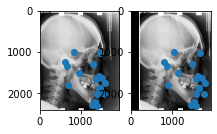

In [20]:
fig = plt.figure()

plt.rcParams["figure.figsize"] = [16,9]
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.imshow(images_rs[0], cmap="gray")
ax2.imshow(images_aug[0], cmap="gray")

k_orig = kp_to_list(keypoints_rs[0].keypoints)
k_aug = kp_to_list(keypoints_aug[0].keypoints)
print(k_aug)
ax1.scatter(*zip(*k_orig))
ax2.scatter(*zip(*k_aug))
plt.show()

In [21]:
ORIG_IMAGE_X = 1935
ORIG_IMAGE_Y = 2400
PIXELS_PER_MM = 10
N_LANDMARKS = 19

# (2400, 1935)

## Let's see how we can generate rotated images and save them with their corresponding annotations

In [22]:
BASE_PATH = "data/RawImage/TrainingData"
BASE_LABELS = "data/AnnotationsByMD/400_senior"

In [23]:
TEST_BASE_PATH = "data/Test"
TEST_BASE_LABELS = "data/AnnotationsByMD/Test"

In [24]:
def img_path_walker(base_path):
    # walk through subdirs to get all image paths
    img_paths = []
    for root, _, files in os.walk(base_path):
        for name in files:
            if name.endswith(".bmp"):
                img_paths.append(os.path.abspath(os.path.join(root, name)))
    return img_paths

In [25]:
def label_walker(base_labels):
    img_labels = {}
    for label_file in os.listdir(base_labels):
        linked_img = label_file[:-3] + "bmp"
        img_labels[linked_img] = extract_labels_from_txt(base_labels + "/" + label_file)
    return img_labels

In [26]:
img_labels = label_walker(BASE_LABELS)
img_paths = img_path_walker(BASE_PATH)

In [27]:
len(img_labels)

400

In [28]:
len(img_paths)

150

In [29]:
img_labels

{'001.bmp': [(835, 996),
  (1473, 1029),
  (1289, 1279),
  (604, 1228),
  (1375, 1654),
  (1386, 2019),
  (1333, 2200),
  (1263, 2272),
  (1305, 2252),
  (694, 1805),
  (1460, 1870),
  (1450, 1864),
  (1588, 1753),
  (1569, 2013),
  (1514, 1620),
  (1382, 2310),
  (944, 1506),
  (1436, 1569),
  (664, 1340)],
 '002.bmp': [(810, 1052),
  (1395, 985),
  (1281, 1238),
  (602, 1258),
  (1393, 1588),
  (1349, 1856),
  (1381, 2005),
  (1320, 2091),
  (1363, 2063),
  (687, 1756),
  (1407, 1718),
  (1426, 1734),
  (1519, 1669),
  (1512, 1835),
  (1462, 1515),
  (1459, 2103),
  (978, 1433),
  (1399, 1445),
  (643, 1353)],
 '003.bmp': [(761, 1105),
  (1329, 911),
  (1250, 1181),
  (622, 1279),
  (1436, 1415),
  (1439, 1744),
  (1460, 1882),
  (1406, 1935),
  (1448, 1920),
  (815, 1710),
  (1451, 1575),
  (1495, 1608),
  (1581, 1449),
  (1596, 1687),
  (1524, 1369),
  (1526, 1923),
  (1008, 1404),
  (1420, 1350),
  (712, 1348)],
 '004.bmp': [(877, 1094),
  (1536, 897),
  (1373, 1239),
  (643, 1235

In [30]:
img_paths

['E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\001.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\002.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\003.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\004.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\005.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\006.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\007.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\008.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\009.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\010.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\TrainingData\\011.bmp',
 'E:\\ktun\\cnn\\CNN-Cephalometric-Analysis\\data\\RawImage\\Trai

In [31]:

# shrink = iaa.Sequential(iaa.AdditiveGaussianNoise(scale=(30, 90)))
# augment_functions = [iaa.Fliplr(1.0)]


# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [180]]

# print(augment_functions)

In [32]:
# shrink = iaa.Sequential([iaa.Scale({"height":256, "width":256})])
# shrink  = iaa.AdditiveGaussianNoise(scale=(30, 90))

# shrink = iaa.Sequential(iaa.AdditiveGaussianNoise(scale=(30, 90)))
# augment_functions = [iaa.Fliplr(1.0)]


# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [90,180]]
# augment_functions += [iaa.Affine(rotate=90)]
# print(augment_functions)

In [33]:
# shrink = iaa.Scale({"height":224, "width":224})
augment_functions = [iaa.Affine(translate_px={"y": (9)})]
augment_functions += [iaa.Affine(translate_px={"y": (-9)})]
augment_functions += [iaa.Affine(translate_px={"x": (7)})]
augment_functions += [iaa.Affine(translate_px={"x": (-7)})]
# augment_functions += [iaa.Affine(rotate=rot_angle) for rot_angle in [180]]


In [34]:
def aug_and_save(img, img_name, label, aug_list, base_path):
    kp = [list_to_kp(label)]

#     img = shrink.augment_image(img)
#     kp = shrink.augment_keypoints(kp)
    
    print("**************************")
    img_save_name = base_path + "/" + img_name + "_aug{}".format(0)
    io.imsave(img_save_name + ".bmp", img)
    with open(img_save_name + ".txt", "w") as lf:
            stringified = [str(tup) for tup in kp_to_list(kp[0].keypoints)]
            print("\n".join(stringified))
            stringified = [s.replace("(", "").replace(")","") for s in stringified]
            
            lf.write("\n".join(stringified))
    for i, aug in enumerate(aug_list):
        img_aug = aug.augment_image(img)
        kp_aug = aug.augment_keypoints(kp)
        # save img:
        img_save_name = base_path + "/" + img_name + "_aug{}".format(i+1)
        io.imsave(img_save_name + ".bmp", img_aug)
        # save labelfile:
        with open(img_save_name + ".txt", "w") as lf:
            stringified = [str(tup) for tup in kp_to_list(kp_aug[0].keypoints)]
            stringified = [s.replace("(", "").replace(")","") for s in stringified]
            lf.write("\n".join(stringified))

In [38]:
for i, path in enumerate(img_paths):
    # import as ubyte if want reduced range for small pics
    # loop_img = img_as_ubyte(io.imread(path, as_grey=True))
    # import normally for resnet-18 attempt:
    loop_img = io.imread(path)
    print(loop_img.shape)
    
    loop_labels = img_labels[path.split("\\")[-1]]
    #print_image(loop_img, loop_labels)
#     aug_and_save(loop_img, path.split("/")[-1][:-4], loop_labels, augment_functions, "data/images/256/final")
    aug_and_save(loop_img, path.split("\\")[-1][:-4], loop_labels, augment_functions, "data/images/trainingAug")


(2400, 1935, 3)
**************************
(835, 996)
(1473, 1029)
(1289, 1279)
(604, 1228)
(1375, 1654)
(1386, 2019)
(1333, 2200)
(1263, 2272)
(1305, 2252)
(694, 1805)
(1460, 1870)
(1450, 1864)
(1588, 1753)
(1569, 2013)
(1514, 1620)
(1382, 2310)
(944, 1506)
(1436, 1569)
(664, 1340)
(2400, 1935, 3)
**************************
(810, 1052)
(1395, 985)
(1281, 1238)
(602, 1258)
(1393, 1588)
(1349, 1856)
(1381, 2005)
(1320, 2091)
(1363, 2063)
(687, 1756)
(1407, 1718)
(1426, 1734)
(1519, 1669)
(1512, 1835)
(1462, 1515)
(1459, 2103)
(978, 1433)
(1399, 1445)
(643, 1353)
(2400, 1935, 3)
**************************
(761, 1105)
(1329, 911)
(1250, 1181)
(622, 1279)
(1436, 1415)
(1439, 1744)
(1460, 1882)
(1406, 1935)
(1448, 1920)
(815, 1710)
(1451, 1575)
(1495, 1608)
(1581, 1449)
(1596, 1687)
(1524, 1369)
(1526, 1923)
(1008, 1404)
(1420, 1350)
(712, 1348)
(2400, 1935, 3)
**************************
(877, 1094)
(1536, 897)
(1373, 1239)
(643, 1235)
(1533, 1591)
(1467, 1833)
(1468, 2016)
(1418, 2091)
(14

(2400, 1935, 3)
**************************
(822, 1056)
(1345, 1007)
(1247, 1267)
(597, 1262)
(1313, 1601)
(1290, 1958)
(1270, 2146)
(1215, 2189)
(1251, 2175)
(729, 1809)
(1410, 1802)
(1425, 1809)
(1525, 1699)
(1517, 1918)
(1458, 1575)
(1390, 2134)
(946, 1501)
(1315, 1523)
(674, 1351)
(2400, 1935, 3)
**************************
(803, 1064)
(1381, 994)
(1246, 1249)
(564, 1224)
(1449, 1496)
(1444, 1792)
(1476, 1893)
(1428, 1963)
(1464, 1942)
(816, 1735)
(1473, 1641)
(1510, 1652)
(1612, 1584)
(1607, 1737)
(1557, 1480)
(1562, 1952)
(1015, 1471)
(1419, 1447)
(653, 1284)
(2400, 1935, 3)
**************************
(753, 1010)
(1307, 874)
(1204, 1135)
(540, 1204)
(1353, 1416)
(1313, 1727)
(1313, 1909)
(1263, 1966)
(1302, 1951)
(710, 1652)
(1366, 1550)
(1391, 1559)
(1550, 1510)
(1545, 1749)
(1457, 1370)
(1391, 1974)
(926, 1327)
(1346, 1294)
(621, 1270)
(2400, 1935, 3)
**************************
(819, 1084)
(1457, 1105)
(1282, 1337)
(563, 1232)
(1359, 1625)
(1373, 1980)
(1408, 2097)
(1343, 2160)
(

(2400, 1935, 3)
**************************
(777, 1110)
(1295, 1012)
(1198, 1244)
(574, 1292)
(1373, 1512)
(1334, 1734)
(1321, 1838)
(1249, 1901)
(1298, 1880)
(755, 1716)
(1361, 1599)
(1363, 1591)
(1475, 1530)
(1460, 1671)
(1411, 1424)
(1384, 1901)
(956, 1413)
(1346, 1381)
(664, 1358)
(2400, 1935, 3)
**************************
(818, 1093)
(1423, 1060)
(1263, 1314)
(607, 1238)
(1365, 1616)
(1346, 1960)
(1346, 2122)
(1294, 2166)
(1328, 2150)
(796, 1760)
(1365, 1805)
(1281, 1785)
(1514, 1710)
(1505, 1912)
(1468, 1600)
(1426, 2145)
(956, 1476)
(1353, 1542)
(698, 1322)
(2400, 1935, 3)
**************************
(811, 988)
(1418, 903)
(1298, 1137)
(605, 1153)
(1480, 1422)
(1451, 1743)
(1460, 1843)
(1402, 1907)
(1443, 1880)
(786, 1690)
(1505, 1564)
(1515, 1559)
(1646, 1505)
(1637, 1678)
(1572, 1392)
(1564, 1951)
(990, 1344)
(1466, 1344)
(666, 1248)
(2400, 1935, 3)
**************************
(824, 1067)
(1402, 984)
(1311, 1220)
(605, 1266)
(1431, 1534)
(1363, 1862)
(1326, 2018)
(1259, 2063)
(13

(2400, 1935, 3)
**************************
(736, 1120)
(1283, 993)
(1166, 1252)
(572, 1296)
(1335, 1494)
(1289, 1770)
(1262, 1896)
(1203, 1925)
(1237, 1920)
(758, 1654)
(1343, 1638)
(1367, 1652)
(1487, 1562)
(1445, 1778)
(1427, 1452)
(1315, 1977)
(940, 1430)
(1331, 1420)
(669, 1364)
(2400, 1935, 3)
**************************
(763, 1030)
(1401, 957)
(1219, 1232)
(545, 1243)
(1378, 1524)
(1492, 1860)
(1503, 1988)
(1453, 2071)
(1490, 2036)
(835, 1838)
(1514, 1724)
(1415, 1706)
(1542, 1608)
(1612, 1815)
(1502, 1511)
(1585, 2075)
(922, 1452)
(1406, 1483)
(630, 1346)
(2400, 1935, 3)
**************************
(775, 980)
(1339, 927)
(1231, 1182)
(545, 1149)
(1290, 1493)
(1214, 1802)
(1192, 1914)
(1123, 1986)
(1167, 1960)
(637, 1694)
(1308, 1675)
(1341, 1685)
(1472, 1594)
(1443, 1779)
(1427, 1463)
(1272, 2021)
(910, 1374)
(1325, 1423)
(595, 1250)
(2400, 1935, 3)
**************************
(823, 1043)
(1407, 1046)
(1281, 1302)
(574, 1222)
(1309, 1589)
(1379, 1957)
(1349, 2107)
(1283, 2159)
(132

(2400, 1935, 3)
**************************
(719, 987)
(1353, 886)
(1267, 1177)
(624, 1198)
(1430, 1460)
(1364, 1804)
(1348, 1965)
(1307, 2019)
(1333, 1998)
(760, 1695)
(1436, 1625)
(1485, 1655)
(1589, 1592)
(1545, 1751)
(1513, 1418)
(1443, 2045)
(954, 1419)
(1390, 1354)
(710, 1399)
(2400, 1935, 3)
**************************
(854, 1128)
(1445, 1079)
(1312, 1314)
(637, 1231)
(1392, 1689)
(1255, 1937)
(1181, 2076)
(1129, 2114)
(1162, 2100)
(656, 1747)
(1362, 1835)
(1390, 1839)
(1527, 1782)
(1436, 1955)
(1501, 1648)
(1255, 2114)
(966, 1518)
(1386, 1560)
(679, 1391)
(2400, 1935, 3)
**************************
(824, 1027)
(1378, 965)
(1265, 1246)
(635, 1213)
(1325, 1540)
(1320, 1850)
(1307, 2022)
(1274, 2070)
(1295, 2051)
(762, 1744)
(1363, 1737)
(1359, 1715)
(1503, 1660)
(1491, 1825)
(1453, 1536)
(1379, 2076)
(983, 1430)
(1360, 1471)
(727, 1383)
(2400, 1935, 3)
**************************
(883, 1063)
(1491, 1006)
(1369, 1255)
(631, 1222)
(1505, 1523)
(1444, 1874)
(1427, 1997)
(1375, 2073)
(14

(2400, 1935, 3)
**************************
(828, 1073)
(1451, 1087)
(1305, 1385)
(591, 1204)
(1345, 1694)
(1286, 1960)
(1179, 2162)
(1106, 2199)
(1146, 2194)
(602, 1935)
(1347, 1857)
(1380, 1907)
(1522, 1825)
(1451, 1998)
(1482, 1683)
(1231, 2230)
(907, 1542)
(1363, 1610)
(618, 1370)
(2400, 1935, 3)
**************************
(774, 1015)
(1351, 992)
(1228, 1263)
(645, 1200)
(1302, 1522)
(1276, 1858)
(1245, 1956)
(1197, 2029)
(1229, 2001)
(674, 1701)
(1338, 1728)
(1354, 1727)
(1504, 1641)
(1453, 1855)
(1439, 1518)
(1335, 2061)
(908, 1433)
(1310, 1473)
(667, 1366)
(2400, 1935, 3)
**************************
(759, 1027)
(1326, 978)
(1243, 1212)
(590, 1205)
(1345, 1557)
(1244, 1877)
(1207, 1990)
(1144, 2059)
(1184, 2033)
(657, 1738)
(1316, 1722)
(1339, 1739)
(1496, 1625)
(1427, 1853)
(1419, 1516)
(1281, 2110)
(905, 1429)
(1349, 1452)
(606, 1339)
(2400, 1935, 3)
**************************
(801, 1039)
(1413, 942)
(1279, 1195)
(606, 1244)
(1468, 1492)
(1425, 1790)
(1430, 1899)
(1380, 1981)
(14

In [52]:
TXT_PATH = "data/images/256/final/001_aug1.txt"

In [306]:
coords_raw = extract_labels_from_txt(TXT_PATH)

In [307]:
coords_raw

[(-707, -868),
 (-1345, -901),
 (-1161, -1151),
 (-476, -1100),
 (-1247, -1526),
 (-1258, -1891),
 (-1205, -2072),
 (-1135, -2144),
 (-1177, -2124),
 (-566, -1677),
 (-1332, -1742),
 (-1322, -1736),
 (-1460, -1625),
 (-1441, -1885),
 (-1386, -1492),
 (-1254, -2182),
 (-816, -1378),
 (-1308, -1441),
 (-536, -1212)]